<a href="https://colab.research.google.com/github/ecustWallace/AdultDataset/blob/master/adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


In [0]:
train_data = pd.read_csv('adult_train.csv')
test_data = pd.read_csv('adult_test.csv')

datasets = [train_data, test_data]

for dataset in datasets:
  dataset.rename(columns={'f1':'age','f2':'workclass','f3':'fnlwgt','f4':'education','f5':'education num','f6':'marital status','f7':'occupation',
                          'f8':'relationship','f9':'race','f10':'sex','f11':'capital gain','f12':'capital loss',
                          'f13':'hours per week','f14':'native country'}, inplace=True)
  
train_data.head()

,age,workclass,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
test_data.head()

,age,workclass,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


Map labels into 0 and 1.

In [0]:
# Map label into 0 and 1
label_mapping = {' <=50K': 0 ,' >50K': 1}
train_data['label'] = train_data['label'].map(label_mapping)
test_data['label'] = test_data['label'].map({' <=50K.':0,' >50K.':1})
train_data.head()

,age,workclass,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [0]:
test_data.head()

,age,workclass,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


Age:

Consider the relation between age and label.


---
1) Histogram of Age given Label

2) Map age into discrete value (According to max var, num = 7)

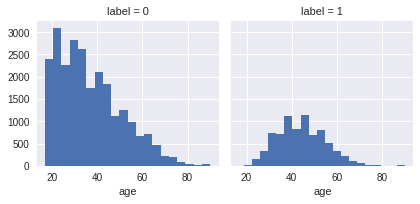

In [0]:
g = sns.FacetGrid(train_data, col='label')
g.map(plt.hist,'age',bins=20)

In [0]:
for i in range(4,10):
  train_data['AgeBand'] = pd.cut(train_data['age'],i)
  print('i='+str(i))
  print(train_data[['AgeBand','label']].groupby(['AgeBand'],as_index=False).mean().var())

i=4
label    0.014214
dtype: float64
i=5
label    0.014923
dtype: float64
i=6
label    0.014336
dtype: float64
i=7
label    0.015864
dtype: float64
i=8
label    0.015559
dtype: float64
i=9
label    0.015096
dtype: float64


In [0]:
train_data['AgeBand'] = pd.cut(train_data['age'],7)
train_data[['AgeBand','label']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending='True')

,AgeBand,label
0,"(16.927, 27.429]",0.032126
1,"(27.429, 37.857]",0.231445
2,"(37.857, 48.286]",0.365975
3,"(48.286, 58.714]",0.383621
4,"(58.714, 69.143]",0.283544
5,"(69.143, 79.571]",0.190945
6,"(79.571, 90.0]",0.132231


In [0]:
for dataset in datasets:
  dataset.loc[dataset['age']<=27.429, 'age'] = 0
  dataset.loc[(dataset['age']>27.429) & (dataset['age']<=37.857), 'age'] = 1
  dataset.loc[(dataset['age']>37.857) & (dataset['age']<=48.286), 'age'] = 2
  dataset.loc[(dataset['age']>48.286) & (dataset['age']<=58.714), 'age'] = 3
  dataset.loc[(dataset['age']>58.714) & (dataset['age']<=69.143), 'age'] = 4
  dataset.loc[(dataset['age']>69.143) & (dataset['age']<=79.571), 'age'] = 5
  dataset.loc[(dataset['age']>79.571) & (dataset['age']<=90.0), 'age'] = 6

train_data.drop(['AgeBand'],axis=1, inplace=True)
train_data.head()

,age,workclass,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,label
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Workclass:

1) Consider the relation between each category and label

2) Count the frequency to see whether it is possible to reduce the dimension

3) Mapping each category into discrete number

In [0]:
train_data[['workclass','label']].groupby(['workclass'],as_index=False).mean().sort_values(by='label',ascending=True)

,workclass,label
3,Never-worked,0.000000
8,Without-pay,0.000000
0,?,0.104031
4,Private,0.218673
7,State-gov,0.271957
6,Self-emp-not-inc,0.284927
2,Local-gov,0.294792
1,Federal-gov,0.386458
5,Self-emp-inc,0.557348


In [0]:
train_data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

According to the information given above, we can group them into:

0) without-pay, never-worked and unknown

1) Private

2) State-gov, self-emp-not-inc, local-gov

3) Federal-gov, self-emp-inc

In [0]:
workclass_map = {' Private':1,' Self-emp-not-inc':2,' Local-gov':2,' ?':0,' State-gov':2,
                 ' Self-emp-inc':3,' Federal-gov':3,' Without-pay':0,' Never-worked':0}
for dataset in datasets:
  dataset['workclass'] = dataset['workclass'].map(workclass_map)

train_data.head()

,age,workclass,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,label
0,2,2,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,3,2,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,1,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,1,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,1,1,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Fnlwgt:

From the figure below, we can see that there is almost no difference between the distribution of label=0 and label=1.

So consider drop this feature or mix it with other features.

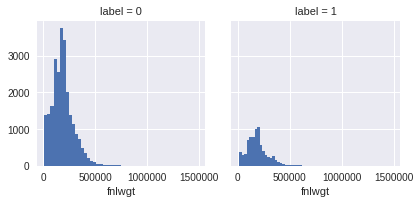

In [0]:
g = sns.FacetGrid(train_data, col='label')
g.map(plt.hist,'fnlwgt',bins=50)

In [0]:
for dataset in datasets:
  dataset.drop(columns=['fnlwgt'],inplace=True)
train_data.head()

,age,workclass,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,label
0,2,2,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,3,2,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,1,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,1,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,1,1,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Education:

From the table below, we can merge these features into 6 discrete values.

Then the fifth feature can be dropped.


In [0]:
train_data[['education','label']].groupby(['education'],as_index=False).mean().sort_values(by='label')

,education,label
13,Preschool,0.000000
3,1st-4th,0.035714
4,5th-6th,0.048048
1,11th,0.051064
6,9th,0.052529
5,7th-8th,0.061920
0,10th,0.066452
2,12th,0.076212
11,HS-grad,0.159509
15,Some-college,0.190235


In [0]:
train_data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [0]:
for dataset in datasets:
  dataset['education'] = dataset['education'].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'UnderHS')
  dataset['education'] = dataset['education'].replace([' HS-grad',' Some-college'],'HS')
  dataset['education'] = dataset['education'].replace([' Assoc-voc',' Assoc-acdm'],'Assoc')
  dataset['education'] = dataset['education'].replace([' Prof-school',' Doctorate'],'Doc')
  dataset['education'] = dataset['education'].replace([' Bachelors'],'Bachelors')
  dataset['education'] = dataset['education'].replace([' Masters'],'Masters')
  dataset['education'] = dataset['education'].replace([' Prof-school',' Doctorate'],'Doc')
  
train_data[['education','label']].groupby(['education'],as_index=False).mean().sort_values(by='label')

,education,label
5,UnderHS,0.057371
3,HS,0.172100
0,Assoc,0.255615
1,Bachelors,0.414753
4,Masters,0.556587
2,Doc,0.737108


In [0]:
edu_map = {'UnderHS':0,'HS':1,'Assoc':2,'Bachelors':3,'Masters':4,'Doc':5}

for dataset in datasets:
  dataset['education'] = dataset['education'].map(edu_map)

train_data.head()

,age,workclass,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,label
0,2,2,3,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,3,2,3,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,1,1,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,1,0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,1,1,3,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [0]:
for dataset in datasets:
  dataset.drop(columns=['education num'],inplace=True)
  
train_data.head()


,age,workclass,education,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,label
0,2,2,3,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,3,2,3,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,1,1,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,1,0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,1,1,3,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Marital Status:

According to the table below, we can see that there is huge difference between 'married' and 'not married'.

So they can simply converged into two category.

In [0]:
train_data[['marital status','label']].groupby(['marital status']).mean()

,label
marital status,
Divorced,0.104209
Married-AF-spouse,0.434783
Married-civ-spouse,0.446848
Married-spouse-absent,0.081340
Never-married,0.045961
Separated,0.064390
Widowed,0.085599


In [0]:
for dataset in datasets:
  dataset['marital status'] = dataset['marital status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated'
                                                                ,' Widowed'],0)
  dataset['marital status'] = dataset['marital status'].replace([' Married-AF-spouse',' Married-civ-spouse'],1)
  
train_data.head()

,age,workclass,education,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,label
0,2,2,3,0,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,3,2,3,1,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,1,1,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,1,0,1,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,1,1,3,1,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Relationship:

This is highly related to marital status. So it is dropped.

In [0]:
train_data[['relationship','label']].groupby(['relationship']).mean()

,label
relationship,
Husband,0.448571
Not-in-family,0.103070
Other-relative,0.037717
Own-child,0.013220
Unmarried,0.063262
Wife,0.475128


In [0]:
for dataset in datasets:
  dataset.drop(columns=['relationship'],inplace=True)
  
train_data.head()

,age,workclass,education,marital status,occupation,race,sex,capital gain,capital loss,hours per week,native country,label
0,2,2,3,0,Adm-clerical,White,Male,2174,0,40,United-States,0
1,3,2,3,1,Exec-managerial,White,Male,0,0,13,United-States,0
2,2,1,1,0,Handlers-cleaners,White,Male,0,0,40,United-States,0
3,3,1,0,1,Handlers-cleaners,Black,Male,0,0,40,United-States,0
4,1,1,3,1,Prof-specialty,Black,Female,0,0,40,Cuba,0


Occupation:

They can be classified into 4 values.

In [0]:
train_data[['occupation','label']].groupby(['occupation']).mean().sort_values(by='label')

,label
occupation,
Priv-house-serv,0.006711
Other-service,0.041578
Handlers-cleaners,0.062774
?,0.103635
Armed-Forces,0.111111
Farming-fishing,0.115694
Machine-op-inspct,0.124875
Adm-clerical,0.134483
Transport-moving,0.200376


In [0]:
train_data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [0]:
occup_map = {' Priv-house-serv':0,' Other-service':0, ' Handlers-cleaners':0, ' ?':1, ' Armed-Forces':1,
            ' Farming-fishing':1, ' Machine-op-inspct':1, ' Adm-clerical':1, ' Transport-moving':2, ' Craft-repair':2, 
            ' Sales':2, ' Tech-support':3, ' Protective-serv':3, ' Prof-specialty':4, ' Exec-managerial':4}
for dataset in datasets:
  dataset['occupation'] = dataset['occupation'].map(occup_map)
  
train_data.head()

,age,workclass,education,marital status,occupation,race,sex,capital gain,capital loss,hours per week,native country,label
0,2,2,3,0,1,White,Male,2174,0,40,United-States,0
1,3,2,3,1,4,White,Male,0,0,13,United-States,0
2,2,1,1,0,0,White,Male,0,0,40,United-States,0
3,3,1,0,1,0,Black,Male,0,0,40,United-States,0
4,1,1,3,1,4,Black,Female,0,0,40,Cuba,0


Race & Sex

Both of these features can be classified into 2 categories.

[Other, Amer, Black] --> 0; [White, Asian] --> 1

Female --> 0; Male --> 1

In [0]:
train_data[['race','label']].groupby(['race']).mean().sort_values(by='label')

,label
race,
Other,0.092251
Amer-Indian-Eskimo,0.115756
Black,0.123880
White,0.255860
Asian-Pac-Islander,0.265640


In [0]:
train_data[['sex','label']].groupby(['sex']).mean().sort_values(by='label')

,label
sex,
Female,0.109461
Male,0.305737


In [0]:
race_map = {' Other':0, ' Amer-Indian-Eskimo':0, ' Black':0, ' White':1, ' Asian-Pac-Islander':1}
sex_map = {' Female':0, ' Male':1}
for dataset in datasets:
  dataset['race'] = dataset['race'].map(race_map)
  dataset['sex'] = dataset['sex'].map(sex_map)
  
  
train_data.head()

,age,workclass,education,marital status,occupation,race,sex,capital gain,capital loss,hours per week,native country,label
0,2,2,3,0,1,1,1,2174,0,40,United-States,0
1,3,2,3,1,4,1,1,0,0,13,United-States,0
2,2,1,1,0,0,1,1,0,0,40,United-States,0
3,3,1,0,1,0,0,1,0,0,40,United-States,0
4,1,1,3,1,4,0,0,0,0,40,Cuba,0


Capital Gain & Capital Loss

Capital Gain: When Gain is larger than 7000, the possibility of >50K will increase dramatically.

Capital Loss is a very rare feature, so we can simply drop it.

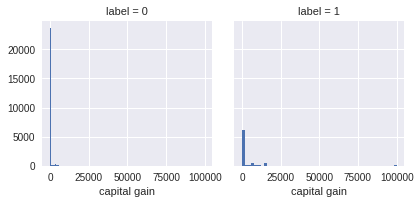

In [0]:
g = sns.FacetGrid(train_data, col='label')
g.map(plt.hist, 'capital gain', bins = 50)

In [0]:
train_data['capital gain 100'] = np.ceil(train_data['capital gain']/1000)
train_data[['capital gain 100','label']].groupby(['capital gain 100']).mean()

,label
capital gain 100,
0.0,0.206506
1.0,0.000000
2.0,0.000000
3.0,0.000000
4.0,0.261628
5.0,0.366935
6.0,0.548387
7.0,0.238095
8.0,0.989051


In [0]:
train_data.drop(columns=['capital gain 100'],inplace=True)
for dataset in datasets:
  dataset.loc[dataset['capital gain']<=7000, 'capital gain'] = 0
  dataset.loc[dataset['capital gain']>7000, 'capital gain'] = 1
  
train_data.head()

,age,workclass,education,marital status,occupation,race,sex,capital gain,capital loss,hours per week,native country,label
0,2,2,3,0,1,1,1,0,0,40,United-States,0
1,3,2,3,1,4,1,1,0,0,13,United-States,0
2,2,1,1,0,0,1,1,0,0,40,United-States,0
3,3,1,0,1,0,0,1,0,0,40,United-States,0
4,1,1,3,1,4,0,0,0,0,40,Cuba,0


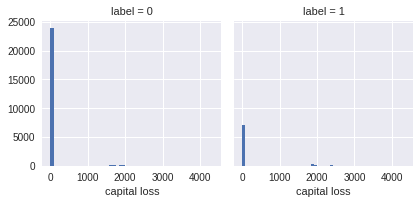

In [0]:
g = sns.FacetGrid(train_data, col='label')
g.map(plt.hist, 'capital loss', bins = 50)

In [0]:
for dataset in datasets:
  dataset.drop(columns=['capital loss'], inplace = True)
  
train_data.head()

,age,workclass,education,marital status,occupation,race,sex,capital gain,hours per week,native country,label
0,2,2,3,0,1,1,1,0,40,United-States,0
1,3,2,3,1,4,1,1,0,13,United-States,0
2,2,1,1,0,0,1,1,0,40,United-States,0
3,3,1,0,1,0,0,1,0,40,United-States,0
4,1,1,3,1,4,0,0,0,40,Cuba,0


Hours per week:

From the diagrams shown above, hours > 40 will be more likely to be >50K.

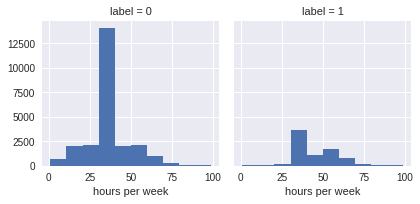

In [0]:
g = sns.FacetGrid(train_data, col='label')
g.map(plt.hist, 'hours per week', bins=10)

In [0]:
train_data['hours_band'] = pd.cut(train_data['hours per week'], bins=5)
train_data[['hours_band','label']].groupby(['hours_band']).mean()

,label
hours_band,
"(0.902, 20.6]",0.066598
"(20.6, 40.2]",0.189009
"(40.2, 59.8]",0.400800
"(59.8, 79.4]",0.415330
"(79.4, 99.0]",0.351906


In [0]:
train_data.drop(columns=['hours_band'],inplace=True)
for dataset in datasets:
  dataset.loc[dataset['hours per week']<=40,'hours per week'] = 0
  dataset.loc[dataset['hours per week']>40,'hours per week'] = 1
  
train_data.head()

,age,workclass,education,marital status,occupation,race,sex,capital gain,hours per week,native country,label
0,2,2,3,0,1,1,1,0,0,United-States,0
1,3,2,3,1,4,1,1,0,0,United-States,0
2,2,1,1,0,0,1,1,0,0,United-States,0
3,3,1,0,1,0,0,1,0,0,United-States,0
4,1,1,3,1,4,0,0,0,0,Cuba,0


Native country:

In this part, the country distributes equally in the range of [0, 0.4].

So let's try to divide them into 4 categories.

In [0]:
train_data[['native country','label']].groupby(['native country']).mean().sort_values(by='label')

,label
native country,
Holand-Netherlands,0.000000
Outlying-US(Guam-USVI-etc),0.000000
Dominican-Republic,0.028571
Columbia,0.033898
Guatemala,0.046875
Mexico,0.051322
Nicaragua,0.058824
Peru,0.064516
Vietnam,0.074627


In [0]:
train_data['native country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [0]:
for dataset in datasets:
  dataset['native country'] = dataset['native country'].replace([' Holand-Netherlands',' Outlying-US(Guam-USVI-etc)',' Dominican-Republic',
                                                                ' Columbia',' Guatemala',' Mexico',' Nicaragua',' Peru',' Vietnam',' Honduras',
                                                                ' El-Salvador',' Haiti'],0)
  dataset['native country'] = dataset['native country'].replace([' Puerto-Rico',' Trinadad&Tobago',' Portugal',' Laos',' Jamaica',' Ecuador',
                                                                ' Thailand'],1)
  dataset['native country'] = dataset['native country'].replace([' Poland', ' South', ' Ireland', ' Hungary', ' United-States', ' Scotland',' ?',
                                                                ' Cuba', ' China', ' Greece'],2)
  dataset['native country'] = dataset['native country'].replace([' Hong',' Philippines',' Germany',' Canada',' England',' Italy',' Cambodia',' Yugoslavia',
                                                                ' Japan', ' Taiwan',' India',' France',' Iran'],3)
  
train_data.head()

,age,workclass,education,marital status,occupation,race,sex,capital gain,hours per week,native country,label
0,2,2,3,0,1,1,1,0,0,2,0
1,3,2,3,1,4,1,1,0,0,2,0
2,2,1,1,0,0,1,1,0,0,2,0
3,3,1,0,1,0,0,1,0,0,2,0
4,1,1,3,1,4,0,0,0,0,2,0


In [0]:
test_data.head()

,age,workclass,education,marital status,occupation,race,sex,capital gain,hours per week,native country,label
0,0,1,0,0,1,0,1,0,0,2,0
1,2,1,1,1,1,1,1,0,1,2,0
2,1,2,2,1,3,1,1,0,0,2,1
3,2,1,1,1,1,0,1,1,0,2,1
4,0,0,1,0,1,1,0,0,0,2,0


After the cleaning of data, then try different classifiers.

1) SVM

2) Random Forest

3) Naive Bayes

4) Perceptron

In [0]:
train_feature = np.array(train_data.iloc[:,:-1])
train_label = np.array(train_data.iloc[:,-1])

test_feature = np.array(test_data.iloc[:,:-1])
test_label = np.array(test_data.iloc[:,-1])



Cross-Validation for each kind of classifier.

In [0]:
c1 = SVC()
scores = cross_val_score(c1, train_feature, train_label, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[0.84799632 0.84566953 0.85027641 0.85211916 0.84505528]
Accuracy: 0.85 (+/- 0.01)


In [0]:
c2 = RandomForestClassifier(20)
scores = cross_val_score(c2, train_feature, train_label, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.83310302 0.83691646 0.84152334 0.8404484  0.84259828]
Accuracy: 0.84 (+/- 0.01)


In [0]:
c3 = GaussianNB()
scores = cross_val_score(c3, train_feature, train_label, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.84077998 0.83599509 0.83952703 0.84413391 0.8404484 ]
Accuracy: 0.84 (+/- 0.01)


In [0]:
c4 = Perceptron()
scores = cross_val_score(c4, train_feature, train_label, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.65008445 0.83215602 0.8289312  0.84628378 0.80144349]
Accuracy: 0.79 (+/- 0.14)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If to

According to the result, SVM performs the best.

In [0]:
c1.fit(train_feature, train_label)
print(c1.score(test_feature,test_label))
test_pred = c1.predict(test_feature)
print(confusion_matrix(test_label,test_pred))
print(f1_score(test_pred, test_label))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8501934770591487
0.6285975331201461


Try augmentation of imbalanced data.

In [0]:
print(train_label[train_label==0].shape)
print(train_label[train_label==1].shape)

(24720,)
(7841,)


We can copy each sample with label 1 two times.

In [0]:
for i in np.where(train_label==1):
  train_label = np.concatenate([train_label, train_label[i], train_label[i]])
  train_feature = np.concatenate([train_feature, train_feature[i,:],train_feature[i,:]])

In [0]:
print(train_label.shape)
print(train_feature.shape)

(48243,)
(48243, 10)


In [0]:
c1.fit(train_feature, train_label)
print(c1.score(test_feature,test_label))
test_pred = c1.predict(test_feature)
print(confusion_matrix(test_label,test_pred))
print(f1_score(test_pred, test_label))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7959584792088938
[[9633 2802]
 [ 520 3326]]
0.6669340284740324


In [0]:
c2.fit(train_feature, train_label)
print(c2.score(test_feature,test_label))
test_pred = c2.predict(test_feature)
print(confusion_matrix(test_label,test_pred))
print(f1_score(test_pred, test_label))

0.8016092377618083
[[9974 2461]
 [ 769 3077]]
0.6557971014492754


In [0]:
c3.fit(train_feature, train_label)
print(c3.score(test_feature,test_label))
test_pred = c3.predict(test_feature)
print(confusion_matrix(test_label,test_pred))
print(f1_score(test_pred, test_label))

0.8330569375345495
[[11235  1200]
 [ 1518  2328]]
0.6314076484947111


In [0]:
c4.fit(train_feature, train_label)
print(c4.score(test_feature,test_label))
test_pred = c4.predict(test_feature)
print(confusion_matrix(test_label,test_pred))
print(f1_score(test_pred, test_label))

0.8401818070143111
[[11622   813]
 [ 1789  2057]]
0.6125670041691483


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
